<a href="https://colab.research.google.com/github/anilsaah/AKS/blob/main/CreditcardUntitled36.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns



In [2]:
dataset=pd.read_csv('/content/creditcard.csv')

In [3]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,69.99,0


In [5]:
print("Dataset Quality Check:")
print(dataset.info())
print("\nMissing Values Check:")
print(dataset.isnull().sum())

Dataset Quality Check:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    161 non-null    int64  
 1   V1      161 non-null    float64
 2   V2      161 non-null    float64
 3   V3      161 non-null    float64
 4   V4      161 non-null    float64
 5   V5      161 non-null    float64
 6   V6      161 non-null    float64
 7   V7      161 non-null    float64
 8   V8      161 non-null    float64
 9   V9      161 non-null    float64
 10  V10     161 non-null    float64
 11  Amount  161 non-null    float64
 12  Class   161 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 16.5 KB
None

Missing Values Check:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
Amount    0
Class     0
dtype: int64


In [6]:
dataset.dropna(inplace=True)

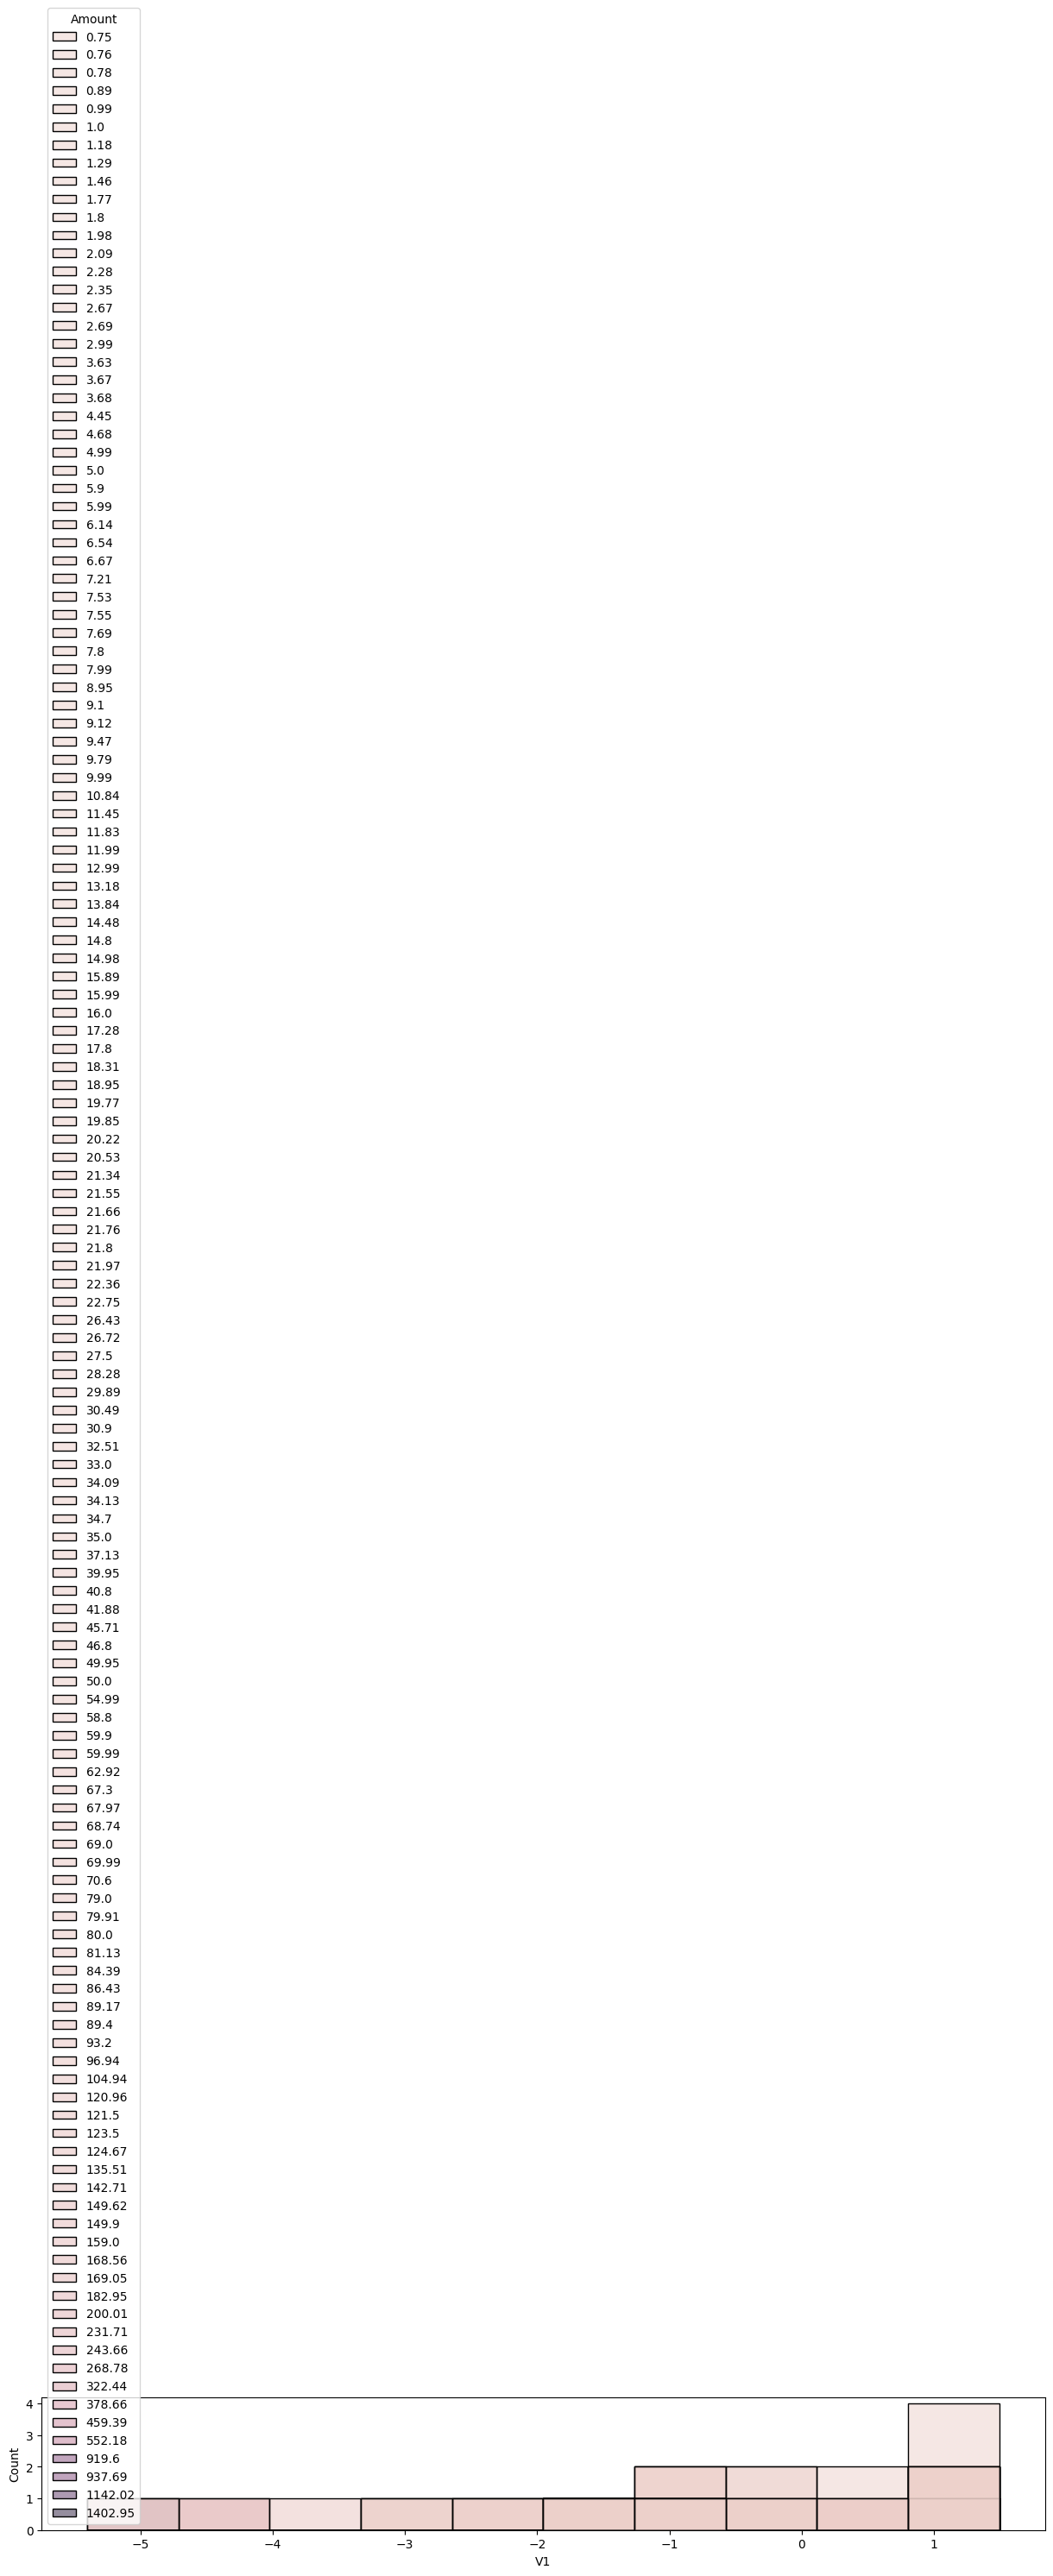

In [8]:
plt.figure(figsize=(15,2))
sns.histplot(data=dataset, x='V1', hue = 'Amount')
plt.show()

In [33]:
numerical_columns = dataset.select_dtypes(include=['int', 'float']).columns.tolist()
categorical_columns = dataset.select_dtypes(include=['object']).columns.tolist()

print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Numerical Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'Amount', 'Class']
Categorical Columns: []


In [32]:
x=dataset.drop(['V1'], axis=1).values
y=dataset['V1'].values

In [34]:
print(x)

[[ 0.00000000e+00 -7.27811730e-02  2.53634674e+00 ...  9.07941720e-02
   1.49620000e+02  0.00000000e+00]
 [ 0.00000000e+00  2.66150712e-01  1.66480113e-01 ... -1.66974414e-01
   2.69000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.34016307e+00  1.77320934e+00 ...  2.07642865e-01
   3.78660000e+02  0.00000000e+00]
 ...
 [ 0.00000000e+00 -1.50764823e-01  2.29179072e+00 ... -7.29861202e-01
   1.42710000e+02  0.00000000e+00]
 [ 0.00000000e+00 -2.56543414e-01  4.26971283e-01 ... -1.93126804e-01
   8.43900000e+01  0.00000000e+00]
 [ 0.00000000e+00  2.74578968e-01 -1.29487732e-01 ... -5.88714056e-01
   1.82950000e+02  0.00000000e+00]]


In [16]:
print(y)

[1.49620e+02 2.69000e+00 3.78660e+02 1.23500e+02 6.99900e+01 3.67000e+00
 4.99000e+00 4.08000e+01 9.32000e+01 3.68000e+00 7.80000e+00 9.99000e+00
 1.21500e+02 2.75000e+01 5.88000e+01 1.59900e+01 1.29900e+01 8.90000e-01
 4.68000e+01 5.00000e+00 2.31710e+02 3.40900e+01 2.28000e+00 2.27500e+01
 8.90000e-01 2.64300e+01 4.18800e+01 1.60000e+01 3.30000e+01 1.29900e+01
 1.72800e+01 4.45000e+00 6.14000e+00 6.14000e+00 1.77000e+00 1.77000e+00
 3.04900e+01 1.80000e+00 2.05300e+01 6.54000e+00 2.98900e+01 2.35000e+00
 1.48000e+01 9.10000e+00 1.59900e+01 2.13400e+01 1.89500e+01 9.99000e+00
 3.09000e+01 2.02200e+01 9.90000e-01 1.40295e+03 7.99000e+00 2.09000e+00
 9.90000e-01 2.17600e+01 1.20960e+02 1.38400e+01 1.38400e+01 2.67000e+00
 1.69050e+02 9.69400e+01 3.41300e+01 3.25100e+01 2.43660e+02 2.15500e+01
 5.99000e+01 7.50000e-01 4.57100e+01 3.50000e+01 6.79700e+01 1.14500e+01
 3.63000e+00 2.16600e+01 2.67200e+01 1.31800e+01 5.99900e+01 1.35510e+02
 9.79000e+00 1.48000e+01 1.98000e+00 6.67000e+00 1.

In [17]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [36]:
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [37]:
y_pred=ml.predict(x_test)
print(y_pred)

[-1.31937936  1.12326972 -0.1935023   0.10586735  0.98004072  0.81375219
 -0.64814573 -2.16208973  0.89287633 -0.89572306  1.69555845  0.79784049
 -1.16750447 -0.70840261 -0.22882353  1.03280443 -1.0389447  -0.36679203
 -0.58338268  0.76793272  0.97450149  5.10651167  1.31551279 -0.96554326
  1.14826132 -0.87083443 -0.01857081 -0.44734676 -1.97750962 -1.6777596
 -0.98903718 -0.91688627  0.58843021  1.10279953 -0.49999018 -0.7951797
  0.94135586 -0.77871091  1.09801378  0.54164239  0.77294969 -1.63335864
 -4.8803729   0.71759256 -0.5769387  -0.41539447  1.17104683  1.20942725
  0.82447889 -0.14651139  1.10279953 -0.01182451 -0.72180635  0.5144809 ]


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [43]:
ml.predict([[0,-1.359807,-0.072781, 2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,0]])

array([3.2250848])

In [46]:
!pip install scikit-learn

In [47]:
from sklearn.metrics import r2_score

In [48]:
r2_score(y_test, y_pred)

-0.23708547651897427

Text(0.5, 1.0, 'Actual VS. Predicted')

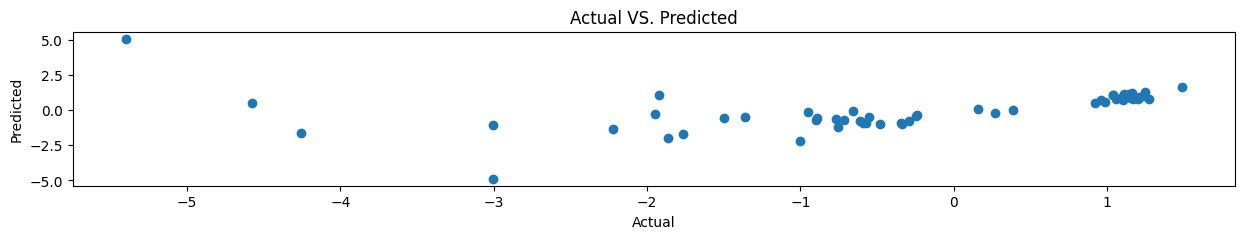

In [50]:
plt.figure(figsize=(15,2))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual VS. Predicted')

In [54]:
pred_y_dataset=pd.DataFrame({'Actual value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_y_dataset[0:20]

,Actual value,Predicted Value,Difference
0,-2.220642,-1.319379,-0.901262
1,1.162281,1.123270,0.039011
2,0.270725,-0.193502,0.464227
3,0.158332,0.105867,0.052464
4,1.212511,0.980041,0.232470
5,1.059387,0.813752,0.245635
6,-0.770196,-0.648146,-0.122051
7,-1.004929,-2.162090,1.157160
8,1.156939,0.892876,0.264063
9,-0.589856,-0.895723,0.305867


from matplotlib import pyplot as plt
_df_0['Actual value'].plot(kind='hist', bins=20, title='Actual value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Predicted Value'].plot(kind='hist', bins=20, title='Predicted Value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Difference'].plot(kind='hist', bins=20, title='Difference')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Actual value', y='Predicted Value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Predicted Value', y='Difference', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['Actual value'].plot(kind='line', figsize=(8, 4), title='Actual value')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Predicted Value'].plot(kind='line', figsize=(8, 4), title='Predicted Value')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Difference'].plot(kind='line', figsize=(8, 4), title='Difference')
plt.gca().spines[['top', 'right']].set_visible(False)